# This notebook runs the regressions using the Data Rich locations and produces a number of interesting visualizations

## Loading the data rich locations

In [1]:
import pandas as pd
data_rich_locs = pd.read_csv('/ihme/homes/arjuns13/notebooks/Documents/Data/data_rich_locations.csv')

In [2]:
data_rich_locs.head()

,location_id,ihme_loc_id,time_window,stars,location_name
0,8,TWN,1980_2017,4,Taiwan
1,33,ARM,1980_2017,5,Armenia
2,35,GEO,1980_2017,4,Georgia
3,36,KAZ,1980_2017,5,Kazakhstan
4,37,KGZ,1980_2017,4,Kyrgyzstan


In [3]:
data_rich_locs.shape

(496, 5)

In [4]:
len(data_rich_locs['location_id'].unique())

496

### Just trying out a central func

In [5]:
from db_queries import get_ids
metrics = get_ids("metric")
metrics.head()

,metric_id,metric_name,metric_description
0,1,Number,Like number of deaths
1,2,Percent,Pc is percent of deaths or attributable risk f...
2,3,Rate,Rate
3,4,Rank,Ranking in GBD Compare.
4,5,Years,For those that are measured in years


### getting the values computed earlier - for HAQ frontiers, Logit_SDIs and older DALYs (without cause IDs)

In [6]:
import pandas as pd
haq_sdi_daly_prev = pd.read_csv('/ihme/homes/arjuns13/notebooks/Documents/sinarj_code/haq_sdi_frontier_with_DALYs_new.csv')

In [7]:
haq_sdi_daly_prev.head()

,Unnamed: 0,Unnamed: 0_x,location_id,age_group_id,sex_id,dalys,population,dalys_per_person,Unnamed: 0_y,V1,logit_sdi,ln_haq,fit2,haq,exp_fit,haq_over_frontier
0,0,0,10,2,1,242166.880954,3812.46,63.519848,4,54,-0.093432,1.588596,1.698284,38.778929,49.921131,0.355749
1,1,23,10,2,2,190983.580528,3638.45,52.490368,4,54,-0.093432,1.588596,1.698284,38.778929,49.921131,0.355749
2,2,1,10,3,1,60192.200603,11333.55,5.310975,199,55,-0.093432,1.678949,1.741248,47.747293,55.112211,0.453038
3,3,24,10,3,2,40855.666418,10834.02,3.771053,199,55,-0.093432,1.678949,1.741248,47.747293,55.112211,0.453038
4,4,2,10,4,1,234034.428986,179784.33,1.301751,394,56,-0.093432,1.688785,1.732339,48.841025,53.993158,0.494548


In [8]:
haq_sdi_daly = haq_sdi_daly_prev[['location_id', 'age_group_id','sex_id','population',\
                                      'logit_sdi','exp_fit','haq','haq_over_frontier']]

## Notice below that the HAQ_over_Frontier values have been standardized to (0,1)

In [9]:
haq_sdi_daly.describe()

,location_id,age_group_id,sex_id,population,logit_sdi,exp_fit,haq,haq_over_frontier
count,7020.000000,7020.000000,7020.000000,7.020000e+03,7020.000000,7020.000000,7020.000000,7020.000000
mean,125.010256,10.500000,1.500000,1.017220e+06,0.637500,70.021786,60.971544,0.456367
std,84.315751,5.188497,0.500036,4.394879e+06,0.848280,22.498862,20.537092,0.138225
min,6.000000,2.000000,1.000000,5.550000e+00,-1.423959,23.638941,16.714754,0.000000
25%,60.000000,6.000000,1.000000,1.850762e+04,0.003273,53.185836,44.504430,0.370257
50%,117.000000,10.500000,1.500000,1.468457e+05,0.629143,66.816719,61.627655,0.458352
75%,176.000000,15.000000,2.000000,5.936088e+05,1.279282,84.743937,77.429238,0.545360
max,522.000000,19.000000,2.000000,6.719956e+07,2.420494,134.159598,98.697928,1.000000


## Taking the intersection of the locations available from the HAQ-SDI data and the list of Data-Rich location

In [10]:
haq_sdi_daly_data_rich_locs = pd.merge(haq_sdi_daly, data_rich_locs, on = ['location_id'])

In [11]:
haq_sdi_daly_data_rich_locs.head()

,location_id,age_group_id,sex_id,population,logit_sdi,exp_fit,haq,haq_over_frontier,ihme_loc_id,time_window,stars,location_name
0,101,2,1,3956.97,2.007232,113.783539,80.909158,0.284354,CAN,1980_2017,5,Canada
1,101,2,2,3747.63,2.007232,113.783539,80.909158,0.284354,CAN,1980_2017,5,Canada
2,101,3,1,11846.48,2.007232,105.188584,86.514461,0.405356,CAN,1980_2017,5,Canada
3,101,3,2,11221.69,2.007232,105.188584,86.514461,0.405356,CAN,1980_2017,5,Canada
4,101,4,1,188899.12,2.007232,111.288500,86.729318,0.358482,CAN,1980_2017,5,Canada


In [12]:
haq_sdi_daly_data_rich_locs.shape

(2736, 12)

In [13]:
len(haq_sdi_daly['location_id'].unique())

195

In [14]:
haq_sdi_daly_data_rich_locs['location_name'].unique()

array(['Canada', 'United States', 'Antigua and Barbuda', 'The Bahamas',
       'Barbados', 'Belize', 'Cuba', 'Dominica', 'Grenada', 'Guyana',
       'Jamaica', 'Saint Lucia', 'Saint Vincent and the Grenadines',
       'Suriname', 'Trinidad and Tobago', 'Ecuador', 'Colombia',
       'Costa Rica', 'Guatemala', 'Mexico', 'Panama', 'Venezuela',
       'Brazil', 'Kuwait', 'Mauritius', 'Bermuda', 'Armenia', 'Georgia',
       'Kazakhstan', 'Kyrgyzstan', 'Puerto Rico', 'Turkmenistan',
       'Uzbekistan', 'Virgin Islands, U.S.', 'Bulgaria', 'Croatia',
       'Czech Republic', 'Hungary', 'Romania', 'Slovenia', 'Belarus',
       'Estonia', 'Latvia', 'Lithuania', 'Moldova', 'Russian Federation',
       'Ukraine', 'Japan', 'South Korea', 'Singapore', 'Australia',
       'New Zealand', 'Austria', 'Belgium', 'Denmark', 'Finland',
       'Taiwan', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Luxembourg', 'Malta', 'Netherlands', 'Norway',
       'Portugal', 'Spain', 

## So we end up only with 76 locations which are both Data-Rich and have HAQ and SDI info

In [15]:
import numpy as np
len(np.intersect1d(haq_sdi_daly['location_id'], data_rich_locs['location_id']))

76

## Assuming that Rate implies DALYs_per_person

In [16]:
location_list = list(haq_sdi_daly_data_rich_locs.location_id.unique())

In [17]:
len(location_list)

76

## Getting the DALYs data for the above 76 locations and the 4 causes: HIV/AIDS (298), Non-melanoma skin cancer (462), Rheumatoid cancer (627), and Hernia (531)

In [18]:
from db_queries import get_outputs as go #724,861,375,456,393
dalys_per_cause_rate = go("cause", cause_id=[298,462,627,531], metric_id=[3],\
                     measure_id=2, gbd_round_id=5,year_id=[2016],sex_id=[1,2],location_id=location_list,\
                    age_group_id = "all")
dalys_per_cause_rate.head()

,age_group_id,cause_id,location_id,measure_id,metric_id,sex_id,year_id,acause,age_group_name,cause_name,expected,location_name,measure_name,metric_name,sex,val,upper,lower
0,2,298,8,2,3,1,2016,hiv,Early Neonatal,HIV/AIDS,False,Taiwan,DALYs (Disability-Adjusted Life Years),Rate,Male,8.357779e-07,0.000001,4.703746e-07
1,2,462,8,2,3,1,2016,neo_nmsc,Early Neonatal,Non-melanoma skin cancer,False,Taiwan,DALYs (Disability-Adjusted Life Years),Rate,Male,0.000000e+00,0.000000,0.000000e+00
2,2,531,8,2,3,1,2016,digest_hernia,Early Neonatal,"Inguinal, femoral, and abdominal hernia",False,Taiwan,DALYs (Disability-Adjusted Life Years),Rate,Male,3.903674e-04,0.000720,1.778299e-04
3,2,627,8,2,3,1,2016,msk_rheumarthritis,Early Neonatal,Rheumatoid arthritis,False,Taiwan,DALYs (Disability-Adjusted Life Years),Rate,Male,0.000000e+00,0.000000,0.000000e+00
4,2,298,8,2,3,2,2016,hiv,Early Neonatal,HIV/AIDS,False,Taiwan,DALYs (Disability-Adjusted Life Years),Rate,Female,7.027887e-07,0.000001,4.086668e-07


### Dropping NaNs, renaiming some variables and checking unique values

In [19]:
dalys_per_cause_rate = dalys_per_cause_rate.dropna()

In [20]:
dalys_per_cause_rate.shape

(13984, 18)

In [21]:
dalys_per_cause_rate = dalys_per_cause_rate[['age_group_id','cause_id','location_id','sex_id','sex','age_group_name',\
                                   'cause_name','location_name','val']]

In [22]:
dalys_per_cause_rate = dalys_per_cause_rate.rename(index=str, columns={"val": "DALYs_per_capita"})

In [23]:
dalys_per_cause_rate.head()

,age_group_id,cause_id,location_id,sex_id,sex,age_group_name,cause_name,location_name,DALYs_per_capita
0,2,298,8,1,Male,Early Neonatal,HIV/AIDS,Taiwan,8.357779e-07
1,2,462,8,1,Male,Early Neonatal,Non-melanoma skin cancer,Taiwan,0.000000e+00
2,2,531,8,1,Male,Early Neonatal,"Inguinal, femoral, and abdominal hernia",Taiwan,3.903674e-04
3,2,627,8,1,Male,Early Neonatal,Rheumatoid arthritis,Taiwan,0.000000e+00
4,2,298,8,2,Female,Early Neonatal,HIV/AIDS,Taiwan,7.027887e-07


### Let's also get the total DALYs and then merge it with the above DF

In [24]:
from db_queries import get_outputs as go
dalys_per_cause_number = go("cause", cause_id=[298,462,627,531], metric_id=[1], \
                     measure_id=2, gbd_round_id=5,year_id=[2016],sex_id=[1,2],location_id=location_list,\
                    age_group_id = "all")
dalys_per_cause_number.head()

,age_group_id,cause_id,location_id,measure_id,metric_id,sex_id,year_id,acause,age_group_name,cause_name,expected,location_name,measure_name,metric_name,sex,val,upper,lower
0,2,298,8,2,1,1,2016,hiv,Early Neonatal,HIV/AIDS,False,Taiwan,DALYs (Disability-Adjusted Life Years),Number,Male,0.001624,0.002531,0.000914
1,2,462,8,2,1,1,2016,neo_nmsc,Early Neonatal,Non-melanoma skin cancer,False,Taiwan,DALYs (Disability-Adjusted Life Years),Number,Male,0.000000,0.000000,0.000000
2,2,531,8,2,1,1,2016,digest_hernia,Early Neonatal,"Inguinal, femoral, and abdominal hernia",False,Taiwan,DALYs (Disability-Adjusted Life Years),Number,Male,0.758738,1.399320,0.345639
3,2,627,8,2,1,1,2016,msk_rheumarthritis,Early Neonatal,Rheumatoid arthritis,False,Taiwan,DALYs (Disability-Adjusted Life Years),Number,Male,0.000000,0.000000,0.000000
4,2,298,8,2,1,2,2016,hiv,Early Neonatal,HIV/AIDS,False,Taiwan,DALYs (Disability-Adjusted Life Years),Number,Female,0.001271,0.002084,0.000739


In [25]:
dalys_per_cause_number = dalys_per_cause_number.dropna()

In [26]:
dalys_per_cause_number.shape

(13984, 18)

In [27]:
dalys_per_cause_number = dalys_per_cause_number[['age_group_id','cause_id','location_id','sex_id','sex','age_group_name',\
                                   'cause_name','location_name','val']]

In [28]:
dalys_per_cause_number = dalys_per_cause_number.rename(index=str, columns={"val": "DALYs_total"})

In [29]:
dalys_per_cause_number.head()

,age_group_id,cause_id,location_id,sex_id,sex,age_group_name,cause_name,location_name,DALYs_total
0,2,298,8,1,Male,Early Neonatal,HIV/AIDS,Taiwan,0.001624
1,2,462,8,1,Male,Early Neonatal,Non-melanoma skin cancer,Taiwan,0.000000
2,2,531,8,1,Male,Early Neonatal,"Inguinal, femoral, and abdominal hernia",Taiwan,0.758738
3,2,627,8,1,Male,Early Neonatal,Rheumatoid arthritis,Taiwan,0.000000
4,2,298,8,2,Female,Early Neonatal,HIV/AIDS,Taiwan,0.001271


In [30]:
dalys_per_cause = pd.merge(dalys_per_cause_rate,dalys_per_cause_number, on=['location_id', 'age_group_id', 'sex_id', 'sex',\
                                                                            'cause_id','age_group_name','cause_name',\
                                                                            'location_name'])
dalys_per_cause.head()

,age_group_id,cause_id,location_id,sex_id,sex,age_group_name,cause_name,location_name,DALYs_per_capita,DALYs_total
0,2,298,8,1,Male,Early Neonatal,HIV/AIDS,Taiwan,8.357779e-07,0.001624
1,2,462,8,1,Male,Early Neonatal,Non-melanoma skin cancer,Taiwan,0.000000e+00,0.000000
2,2,531,8,1,Male,Early Neonatal,"Inguinal, femoral, and abdominal hernia",Taiwan,3.903674e-04,0.758738
3,2,627,8,1,Male,Early Neonatal,Rheumatoid arthritis,Taiwan,0.000000e+00,0.000000
4,2,298,8,2,Female,Early Neonatal,HIV/AIDS,Taiwan,7.027887e-07,0.001271


## Merging the DALYs data with the HAQ-SDI data

In [31]:
dalys_haq_sdi_withCauses = pd.merge(dalys_per_cause, haq_sdi_daly, on=['location_id', 'age_group_id', 'sex_id'])

### Below code just returns the 4 column fields after removing the duplicate entries

In [32]:
dalys_haq_sdi_withCauses_distinct = dalys_haq_sdi_withCauses[['age_group_id','age_group_name','cause_id','cause_name', \
                                                             'sex_id', 'sex']].drop_duplicates()

### Removing the nominal variables before running the regressions

In [33]:
dalys_haq_sdi_withCauses_forAnalysis = dalys_haq_sdi_withCauses[['age_group_id','cause_id','location_id','sex_id',\
                                                                 'DALYs_per_capita','logit_sdi','exp_fit','haq',\
                                                                 'haq_over_frontier', 'DALYs_total', 'population']]

In [34]:
dalys_haq_sdi_withCauses_forAnalysis.head()

,age_group_id,cause_id,location_id,sex_id,DALYs_per_capita,logit_sdi,exp_fit,haq,haq_over_frontier,DALYs_total,population
0,2,298,8,1,8.357779e-07,1.820419,105.745195,87.15721,0.407256,0.001624,1917.29
1,2,462,8,1,0.000000e+00,1.820419,105.745195,87.15721,0.407256,0.000000,1917.29
2,2,531,8,1,3.903674e-04,1.820419,105.745195,87.15721,0.407256,0.758738,1917.29
3,2,627,8,1,0.000000e+00,1.820419,105.745195,87.15721,0.407256,0.000000,1917.29
4,2,298,8,2,7.027887e-07,1.820419,105.745195,87.15721,0.407256,0.001271,1751.68


In [35]:
dalys_haq_sdi_withCauses_forAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10944 entries, 0 to 10943
Data columns (total 11 columns):
age_group_id         10944 non-null int64
cause_id             10944 non-null int64
location_id          10944 non-null int64
sex_id               10944 non-null int64
DALYs_per_capita     10944 non-null float64
logit_sdi            10944 non-null float64
exp_fit              10944 non-null float64
haq                  10944 non-null float64
haq_over_frontier    10944 non-null float64
DALYs_total          10944 non-null float64
population           10944 non-null float64
dtypes: float64(7), int64(4)
memory usage: 1.0 MB


In [36]:
dalys_haq_sdi_withCauses_forAnalysis.describe()

,age_group_id,cause_id,location_id,sex_id,DALYs_per_capita,logit_sdi,exp_fit,haq,haq_over_frontier,DALYs_total,population
count,10944.000000,10944.000000,10944.000000,10944.000000,10944.000000,10944.000000,10944.000000,10944.000000,10944.000000,10944.000000,1.094400e+04
mean,10.500000,479.500000,97.644737,1.500000,0.000919,1.298705,86.695416,76.037364,0.474925,566.366398,6.501938e+05
std,5.188365,120.064846,64.216333,0.500023,0.002686,0.596947,19.442584,14.618518,0.095648,4835.701355,1.496337e+06
min,2.000000,298.000000,8.000000,1.000000,0.000000,0.003273,43.523801,39.358989,0.161587,0.000000,8.730000e+00
25%,6.000000,421.000000,62.750000,1.000000,0.000033,0.785954,69.662598,63.904881,0.414071,1.347700,1.598655e+04
50%,10.500000,496.500000,88.500000,1.500000,0.000213,1.323145,85.939886,78.251327,0.471452,23.984393,1.442855e+05
75%,15.000000,555.000000,112.250000,2.000000,0.000761,1.825882,101.889869,89.109377,0.534501,168.681374,4.924894e+05
max,19.000000,627.000000,422.000000,2.000000,0.049127,2.420494,134.159598,98.697928,0.828200,257210.940602,1.189232e+07


In [37]:
18*76*2

2736

### It can be seen below that we have exactly 2736 entries per cause-id (from 76 data-rich locations, 18 age groups, 2 sexes). For one of the 8 causes (that we picked randomly) we don't have data for all of the above categories 

In [38]:
dalys_haq_sdi_withCauses_forAnalysis.groupby(['cause_id']).count()

,age_group_id,location_id,sex_id,DALYs_per_capita,logit_sdi,exp_fit,haq,haq_over_frontier,DALYs_total,population
cause_id,,,,,,,,,,
298,2736,2736,2736,2736,2736,2736,2736,2736,2736,2736
462,2736,2736,2736,2736,2736,2736,2736,2736,2736,2736
531,2736,2736,2736,2736,2736,2736,2736,2736,2736,2736
627,2736,2736,2736,2736,2736,2736,2736,2736,2736,2736


## Below we're just creating a copy of the above data - this could be replaced by code intending to analyze a subset of the data, say just a few causes, few age groups etc

In [39]:
dalys_haq_sdi_withCauses_forAnalysis_4causes = dalys_haq_sdi_withCauses_forAnalysis
#dalys_haq_sdi_withCauses_forAnalysis.loc[dalys_haq_sdi_withCauses_forAnalysis['cause_id'].isin([298,462,627,531])]
dalys_haq_sdi_withCauses_forAnalysis_4causes

,age_group_id,cause_id,location_id,sex_id,DALYs_per_capita,logit_sdi,exp_fit,haq,haq_over_frontier,DALYs_total,population
0,2,298,8,1,8.357779e-07,1.820419,105.745195,87.157210,0.407256,0.001624,1917.29
1,2,462,8,1,0.000000e+00,1.820419,105.745195,87.157210,0.407256,0.000000,1917.29
2,2,531,8,1,3.903674e-04,1.820419,105.745195,87.157210,0.407256,0.758738,1917.29
3,2,627,8,1,0.000000e+00,1.820419,105.745195,87.157210,0.407256,0.000000,1917.29
4,2,298,8,2,7.027887e-07,1.820419,105.745195,87.157210,0.407256,0.001271,1751.68
5,2,462,8,2,0.000000e+00,1.820419,105.745195,87.157210,0.407256,0.000000,1751.68
6,2,531,8,2,1.048076e-04,1.820419,105.745195,87.157210,0.407256,0.189492,1751.68
7,2,627,8,2,0.000000e+00,1.820419,105.745195,87.157210,0.407256,0.000000,1751.68
8,3,298,8,1,7.388500e-07,1.820419,99.312530,87.636810,0.470494,0.004313,5752.95
9,3,462,8,1,0.000000e+00,1.820419,99.312530,87.636810,0.470494,0.000000,5752.95


### The age-groups for ages above 74 have been removed

## Capping exp_fit2 to 100 for the corresponding values of exp_fit

In [40]:
dalys_haq_sdi_withCauses_forAnalysis_4causes.loc[dalys_haq_sdi_withCauses_forAnalysis_4causes['exp_fit'] > 100.0, 'exp_fit']=100

/ihme/homes/arjuns13/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [41]:
dalys_haq_sdi_withCauses_forAnalysis_4causes.exp_fit.unique()

array([100.        ,  99.31252961,  99.69020326,  96.46098197,
        96.77922906,  95.80249896,  94.67815097,  71.92806321,
        73.39965767,  74.40247578,  83.97671174,  85.56145866,
        84.64618726,  71.36363353,  71.59604438,  72.29500822,
        71.4244993 ,  70.40217366,  69.32004527,  68.6477826 ,
        68.29406634,  65.23784329,  63.69899062,  63.22711785,
        62.19235485,  71.46098637,  73.02543619,  73.9781499 ,
        83.59690064,  85.23443736,  84.285529  ,  70.91171851,
        71.12568641,  71.85222478,  70.98642457,  69.95770064,
        68.86934008,  68.21617549,  67.85301569,  64.80792904,
        63.25016382,  62.78449034,  61.752069  ,  76.41362992,
        76.96743756,  78.46070869,  87.58695605,  88.65862271,
        88.06971141,  75.69994434,  76.11491352,  76.53908986,
        75.62363899,  74.66664734,  73.64857088,  72.78825138,
        72.52890445,  69.36859662,  68.02175526,  67.4891622 ,
        66.43359943,  59.35996092,  63.13291932,  62.85

### Creating the groups (Cause-Id, Age-Group, Sex-Id)

In [42]:
dalys_haq_sdi_grouped =  \
dict(tuple(dalys_haq_sdi_withCauses_forAnalysis_4causes.groupby(['cause_id','age_group_id', 'sex_id'])))

In [43]:
for g in dalys_haq_sdi_grouped:
    print(g)

(298, 2, 1)
(298, 2, 2)
(298, 3, 1)
(298, 3, 2)
(298, 4, 1)
(298, 4, 2)
(298, 5, 1)
(298, 5, 2)
(298, 6, 1)
(298, 6, 2)
(298, 7, 1)
(298, 7, 2)
(298, 8, 1)
(298, 8, 2)
(298, 9, 1)
(298, 9, 2)
(298, 10, 1)
(298, 10, 2)
(298, 11, 1)
(298, 11, 2)
(298, 12, 1)
(298, 12, 2)
(298, 13, 1)
(298, 13, 2)
(298, 14, 1)
(298, 14, 2)
(298, 15, 1)
(298, 15, 2)
(298, 16, 1)
(298, 16, 2)
(298, 17, 1)
(298, 17, 2)
(298, 18, 1)
(298, 18, 2)
(298, 19, 1)
(298, 19, 2)
(462, 2, 1)
(462, 2, 2)
(462, 3, 1)
(462, 3, 2)
(462, 4, 1)
(462, 4, 2)
(462, 5, 1)
(462, 5, 2)
(462, 6, 1)
(462, 6, 2)
(462, 7, 1)
(462, 7, 2)
(462, 8, 1)
(462, 8, 2)
(462, 9, 1)
(462, 9, 2)
(462, 10, 1)
(462, 10, 2)
(462, 11, 1)
(462, 11, 2)
(462, 12, 1)
(462, 12, 2)
(462, 13, 1)
(462, 13, 2)
(462, 14, 1)
(462, 14, 2)
(462, 15, 1)
(462, 15, 2)
(462, 16, 1)
(462, 16, 2)
(462, 17, 1)
(462, 17, 2)
(462, 18, 1)
(462, 18, 2)
(462, 19, 1)
(462, 19, 2)
(531, 2, 1)
(531, 2, 2)
(531, 3, 1)
(531, 3, 2)
(531, 4, 1)
(531, 4, 2)
(531, 5, 1)
(531, 5, 2)


### This is just how the data looks for the cause 298, age group 2, and sex 1

In [44]:
dalys_haq_sdi_grouped[298,2,1].head()

,age_group_id,cause_id,location_id,sex_id,DALYs_per_capita,logit_sdi,exp_fit,haq,haq_over_frontier,DALYs_total,population
0,2,298,8,1,8.357779e-07,1.820419,100.000000,87.157210,0.407256,0.001624,1917.29
144,2,298,33,1,1.011174e-05,0.837812,71.928063,74.070506,0.630560,0.004135,455.54
288,2,298,35,1,7.123753e-06,0.821201,71.460986,66.238152,0.518811,0.003620,649.35
432,2,298,36,1,1.292185e-05,0.992061,76.413630,70.262202,0.510756,0.047207,3871.85
576,2,298,37,1,2.355951e-05,0.348131,59.359961,61.583071,0.638887,0.035878,1493.66


In [45]:
g

(627, 19, 2)

In [46]:
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

df = dalys_haq_sdi_grouped[298, 2, 1]

plt.plot(df.logit_sdi, df['haq'], 'o', label='age-specific estimates for age ID, sex ID {}'.format(g))
plt.plot(df.logit_sdi, df['exp_fit'], 'x', label= 'frontier estimates for age ID, sex ID {}'.format(g))
plt.xlabel('logit SDI')
plt.ylabel('HAQ')
plt.legend(bbox_to_anchor=(1, 1))

# Set HAQ frontier to 0 for predictions dataframe

In [47]:
# Create df for predictions where haq_frontier is set to 0
df_predictions = dalys_haq_sdi_withCauses_forAnalysis_4causes.copy()
df_predictions['haq_over_frontier'] = 0
df_predictions.head()

,age_group_id,cause_id,location_id,sex_id,DALYs_per_capita,logit_sdi,exp_fit,haq,haq_over_frontier,DALYs_total,population
0,2,298,8,1,8.357779e-07,1.820419,100.0,87.15721,0,0.001624,1917.29
1,2,462,8,1,0.000000e+00,1.820419,100.0,87.15721,0,0.000000,1917.29
2,2,531,8,1,3.903674e-04,1.820419,100.0,87.15721,0,0.758738,1917.29
3,2,627,8,1,0.000000e+00,1.820419,100.0,87.15721,0,0.000000,1917.29
4,2,298,8,2,7.027887e-07,1.820419,100.0,87.15721,0,0.001271,1751.68


In [48]:
grouped_for_predictions =  dict(tuple(df_predictions.groupby(['cause_id','age_group_id', 'sex_id'])))

In [49]:
grouped_for_predictions[298,2, 2].shape

(76, 11)

# Evaluate correlations between outcome and covariates

In [50]:
for g in dalys_haq_sdi_grouped:
    df=dalys_haq_sdi_grouped[g]
    df_filtered = df[['DALYs_per_capita','haq_over_frontier', 'logit_sdi']]
    corr = df_filtered.corr()
    print(corr, g)

                   DALYs_per_capita  haq_over_frontier  logit_sdi
DALYs_per_capita           1.000000           0.018823  -0.476281
haq_over_frontier          0.018823           1.000000  -0.428207
logit_sdi                 -0.476281          -0.428207   1.000000 (298, 2, 1)
                   DALYs_per_capita  haq_over_frontier  logit_sdi
DALYs_per_capita           1.000000           0.002768  -0.480258
haq_over_frontier          0.002768           1.000000  -0.428207
logit_sdi                 -0.480258          -0.428207   1.000000 (298, 2, 2)
                   DALYs_per_capita  haq_over_frontier  logit_sdi
DALYs_per_capita           1.000000          -0.066959  -0.472878
haq_over_frontier         -0.066959           1.000000  -0.111189
logit_sdi                 -0.472878          -0.111189   1.000000 (298, 3, 1)
                   DALYs_per_capita  haq_over_frontier  logit_sdi
DALYs_per_capita            1.00000          -0.077940  -0.481750
haq_over_frontier          -0.07794     

                   DALYs_per_capita  haq_over_frontier  logit_sdi
DALYs_per_capita           1.000000           0.060505  -0.517345
haq_over_frontier          0.060505           1.000000  -0.369216
logit_sdi                 -0.517345          -0.369216   1.000000 (462, 12, 2)
                   DALYs_per_capita  haq_over_frontier  logit_sdi
DALYs_per_capita           1.000000           0.064254  -0.587141
haq_over_frontier          0.064254           1.000000  -0.465350
logit_sdi                 -0.587141          -0.465350   1.000000 (462, 13, 1)
                   DALYs_per_capita  haq_over_frontier  logit_sdi
DALYs_per_capita           1.000000           0.296968   -0.61909
haq_over_frontier          0.296968           1.000000   -0.46535
logit_sdi                 -0.619090          -0.465350    1.00000 (462, 13, 2)
                   DALYs_per_capita  haq_over_frontier  logit_sdi
DALYs_per_capita           1.000000           0.051916  -0.480579
haq_over_frontier          0.051916  

                   DALYs_per_capita  haq_over_frontier  logit_sdi
DALYs_per_capita           1.000000          -0.223618  -0.037259
haq_over_frontier         -0.223618           1.000000  -0.616175
logit_sdi                 -0.037259          -0.616175   1.000000 (627, 7, 1)
                   DALYs_per_capita  haq_over_frontier  logit_sdi
DALYs_per_capita           1.000000          -0.339607   0.398208
haq_over_frontier         -0.339607           1.000000  -0.616175
logit_sdi                  0.398208          -0.616175   1.000000 (627, 7, 2)
                   DALYs_per_capita  haq_over_frontier  logit_sdi
DALYs_per_capita           1.000000          -0.020953  -0.161621
haq_over_frontier         -0.020953           1.000000  -0.490237
logit_sdi                 -0.161621          -0.490237   1.000000 (627, 8, 1)
                   DALYs_per_capita  haq_over_frontier  logit_sdi
DALYs_per_capita           1.000000          -0.114719   0.286817
haq_over_frontier         -0.114719     

In [51]:
# correlations for all age-sex combined

df_filtered = dalys_haq_sdi_withCauses_forAnalysis_4causes[['DALYs_per_capita','haq_over_frontier', 'logit_sdi']]
corr = df_filtered.corr()
print(corr)

                   DALYs_per_capita  haq_over_frontier  logit_sdi
DALYs_per_capita           1.000000          -0.034698  -0.161164
haq_over_frontier         -0.034698           1.000000  -0.481437
logit_sdi                 -0.161164          -0.481437   1.000000


# for each age-sex group, fit model with actual data and predict for data with HAQ frontier set to 0

In [52]:
dalys_haq_sdi_answers = pd.DataFrame(columns=['cause_id','age_group_id', 'sex_id',\
                                              'intercept','intercept_pValue','haq_over_frontier_coef',\
                                              'haq_over_frontier_coef_pValue','sdi_coef',\
                                              'sdi_coef_pValue','r2',])

In [53]:
import statsmodels.formula.api as smf
i=0
for g in dalys_haq_sdi_grouped:
    df=dalys_haq_sdi_grouped[g]
    linear_reg = smf.ols("DALYs_per_capita ~ haq_over_frontier + logit_sdi", \
                      data = df)
    linear_reg_fit = linear_reg.fit()
    print(linear_reg_fit.summary(), g)
    df['predictions_xtest_linear'] = linear_reg_fit.predict(dalys_haq_sdi_grouped[g])
    df['residuals'] = df['DALYs_per_capita'] - df['predictions_xtest_linear']
    df['predictions_counterfactual'] = (linear_reg_fit.predict(grouped_for_predictions[g]))
    df['counterfactual_dalys_total'] = (df['predictions_counterfactual'] + df['residuals']) * df['population']
    df['ratio'] = df['counterfactual_dalys_total']/df['DALYs_total']
    
    df['intercept'] = linear_reg_fit.params[0]
    df['haq_over_frontier_coef'] = linear_reg_fit.params[1]
    df['sdi_coef'] = linear_reg_fit.params[2]
    df['r2'] = linear_reg_fit.rsquared
    
    #import pdb; pdb.set_trace()
    predictions = linear_reg_fit.get_prediction(grouped_for_predictions[g])
    predictions_df = predictions.summary_frame(alpha=0.05).sort_index()
    
    df2 = df.reset_index()
    df3 = pd.merge(df2, predictions_df, left_index=True, right_index=True)
    df3 = df3.set_index('index')
    df['se'] = df3['mean_se']
    df['mean'] = df3['mean']
    
    dalys_haq_sdi_answers.loc[i] = [g[0],g[1],g[2],linear_reg_fit.params[0],linear_reg_fit.pvalues.Intercept,\
                                    linear_reg_fit.params[1],linear_reg_fit.pvalues.haq_over_frontier,\
                                    linear_reg_fit.params[2],linear_reg_fit.pvalues.logit_sdi,\
                                    linear_reg_fit.rsquared]
    i+=1
    #df['lower_ci'] = (df3['mean_ci_lower'] + df3['residuals']) * df3['population']
    #df['upper_ci'] = (df3['mean_ci_upper'] + df3['residuals']) * df3['population']


                            OLS Regression Results                            
Dep. Variable:       DALYs_per_capita   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     13.42
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           1.09e-05
Time:                        15:55:24   Log-Likelihood:                 707.55
No. Observations:                  76   AIC:                            -1409.
Df Residuals:                      73   BIC:                            -1402.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          6.616e-05    1.4e-0

                            OLS Regression Results                            
Dep. Variable:       DALYs_per_capita   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     53.12
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           5.76e-15
Time:                        15:55:25   Log-Likelihood:                 482.94
No. Observations:                  76   AIC:                            -959.9
Df Residuals:                      73   BIC:                            -952.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0045      0.00

                            OLS Regression Results                            
Dep. Variable:       DALYs_per_capita   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     17.18
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           7.71e-07
Time:                        15:55:26   Log-Likelihood:                 495.43
No. Observations:                  76   AIC:                            -984.9
Df Residuals:                      73   BIC:                            -977.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0014      0.00

                            OLS Regression Results                            
Dep. Variable:       DALYs_per_capita   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     30.23
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           2.72e-10
Time:                        15:55:26   Log-Likelihood:                 272.00
No. Observations:                  76   AIC:                            -538.0
Df Residuals:                      73   BIC:                            -531.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0404      0.00

                            OLS Regression Results                            
Dep. Variable:       DALYs_per_capita   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     29.50
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           4.08e-10
Time:                        15:55:27   Log-Likelihood:                 274.81
No. Observations:                  76   AIC:                            -543.6
Df Residuals:                      73   BIC:                            -536.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0397      0.00

                            OLS Regression Results                            
Dep. Variable:       DALYs_per_capita   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     26.99
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           1.68e-09
Time:                        15:55:27   Log-Likelihood:                 365.09
No. Observations:                  76   AIC:                            -724.2
Df Residuals:                      73   BIC:                            -717.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0111      0.00

/ihme/homes/arjuns13/miniconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/ihme/homes/arjuns13/miniconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1594: RuntimeWarning: invalid value encountered in double_scalars
  return self.mse_model/self.mse_resid
/ihme/homes/arjuns13/miniconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:846: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/ihme/homes/arjuns13/miniconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:47: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
/ihme/homes/arjuns13/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_di

                            OLS Regression Results                            
Dep. Variable:       DALYs_per_capita   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 30 Apr 2019   Prob (F-statistic):                nan
Time:                        15:55:28   Log-Likelihood:                    inf
No. Observations:                  76   AIC:                              -inf
Df Residuals:                      73   BIC:                              -inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept                  0          

                            OLS Regression Results                            
Dep. Variable:       DALYs_per_capita   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 30 Apr 2019   Prob (F-statistic):                nan
Time:                        15:55:28   Log-Likelihood:                    inf
No. Observations:                  76   AIC:                              -inf
Df Residuals:                      73   BIC:                              -inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept                  0          

                            OLS Regression Results                            
Dep. Variable:       DALYs_per_capita   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 30 Apr 2019   Prob (F-statistic):                nan
Time:                        15:55:29   Log-Likelihood:                    inf
No. Observations:                  76   AIC:                              -inf
Df Residuals:                      73   BIC:                              -inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept                  0          

                            OLS Regression Results                            
Dep. Variable:       DALYs_per_capita   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     35.99
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           1.33e-11
Time:                        15:55:30   Log-Likelihood:                 685.95
No. Observations:                  76   AIC:                            -1366.
Df Residuals:                      73   BIC:                            -1359.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0002   2.38e-0

                            OLS Regression Results                            
Dep. Variable:       DALYs_per_capita   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     22.69
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           2.17e-08
Time:                        15:55:30   Log-Likelihood:                 680.46
No. Observations:                  76   AIC:                            -1355.
Df Residuals:                      73   BIC:                            -1348.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0001   2.77e-0

                            OLS Regression Results                            
Dep. Variable:       DALYs_per_capita   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     7.119
Date:                Tue, 30 Apr 2019   Prob (F-statistic):            0.00150
Time:                        15:55:31   Log-Likelihood:                 511.75
No. Observations:                  76   AIC:                            -1017.
Df Residuals:                      73   BIC:                            -1011.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0012      0.00

                            OLS Regression Results                            
Dep. Variable:       DALYs_per_capita   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.045
Date:                Tue, 30 Apr 2019   Prob (F-statistic):              0.137
Time:                        15:55:32   Log-Likelihood:                 448.41
No. Observations:                  76   AIC:                            -890.8
Df Residuals:                      73   BIC:                            -883.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0008      0.00

                            OLS Regression Results                            
Dep. Variable:       DALYs_per_capita   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     10.41
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           0.000105
Time:                        15:55:32   Log-Likelihood:                 424.27
No. Observations:                  76   AIC:                            -842.5
Df Residuals:                      73   BIC:                            -835.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0012      0.00

                            OLS Regression Results                            
Dep. Variable:       DALYs_per_capita   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     17.35
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           6.83e-07
Time:                        15:55:33   Log-Likelihood:                 588.33
No. Observations:                  76   AIC:                            -1171.
Df Residuals:                      73   BIC:                            -1164.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0004      0.00

                            OLS Regression Results                            
Dep. Variable:       DALYs_per_capita   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     9.490
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           0.000217
Time:                        15:55:33   Log-Likelihood:                 549.54
No. Observations:                  76   AIC:                            -1093.
Df Residuals:                      73   BIC:                            -1086.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0008      0.00

                            OLS Regression Results                            
Dep. Variable:       DALYs_per_capita   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     8.801
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           0.000376
Time:                        15:55:34   Log-Likelihood:                 500.20
No. Observations:                  76   AIC:                            -994.4
Df Residuals:                      73   BIC:                            -987.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0016      0.00

                            OLS Regression Results                            
Dep. Variable:       DALYs_per_capita   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     7.940
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           0.000758
Time:                        15:55:34   Log-Likelihood:                 464.49
No. Observations:                  76   AIC:                            -923.0
Df Residuals:                      73   BIC:                            -916.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0029      0.00

                            OLS Regression Results                            
Dep. Variable:       DALYs_per_capita   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     5.660
Date:                Tue, 30 Apr 2019   Prob (F-statistic):            0.00519
Time:                        15:55:35   Log-Likelihood:                 422.76
No. Observations:                  76   AIC:                            -839.5
Df Residuals:                      73   BIC:                            -832.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0027      0.00

                            OLS Regression Results                            
Dep. Variable:       DALYs_per_capita   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 30 Apr 2019   Prob (F-statistic):                nan
Time:                        15:55:35   Log-Likelihood:                    inf
No. Observations:                  76   AIC:                              -inf
Df Residuals:                      73   BIC:                              -inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept                  0          

                            OLS Regression Results                            
Dep. Variable:       DALYs_per_capita   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.2764
Date:                Tue, 30 Apr 2019   Prob (F-statistic):              0.759
Time:                        15:55:36   Log-Likelihood:                 782.37
No. Observations:                  76   AIC:                            -1559.
Df Residuals:                      73   BIC:                            -1552.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.433e-05   9.53e-0

                            OLS Regression Results                            
Dep. Variable:       DALYs_per_capita   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8857
Date:                Tue, 30 Apr 2019   Prob (F-statistic):              0.417
Time:                        15:55:36   Log-Likelihood:                 633.38
No. Observations:                  76   AIC:                            -1261.
Df Residuals:                      73   BIC:                            -1254.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0002    5.7e-0

                            OLS Regression Results                            
Dep. Variable:       DALYs_per_capita   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.4804
Date:                Tue, 30 Apr 2019   Prob (F-statistic):              0.620
Time:                        15:55:37   Log-Likelihood:                 566.84
No. Observations:                  76   AIC:                            -1128.
Df Residuals:                      73   BIC:                            -1121.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0004      0.00

                            OLS Regression Results                            
Dep. Variable:       DALYs_per_capita   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                   0.05194
Date:                Tue, 30 Apr 2019   Prob (F-statistic):              0.949
Time:                        15:55:38   Log-Likelihood:                 505.30
No. Observations:                  76   AIC:                            -1005.
Df Residuals:                      73   BIC:                            -997.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0012      0.00

                            OLS Regression Results                            
Dep. Variable:       DALYs_per_capita   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.982
Date:                Tue, 30 Apr 2019   Prob (F-statistic):              0.145
Time:                        15:55:38   Log-Likelihood:                 458.59
No. Observations:                  76   AIC:                            -911.2
Df Residuals:                      73   BIC:                            -904.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0020      0.00

In [54]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(dalys_haq_sdi_answers)

,cause_id,age_group_id,sex_id,intercept,intercept_pValue,haq_over_frontier_coef,haq_over_frontier_coef_pValue,sdi_coef,sdi_coef_pValue,r2
0,298.0,2.0,1.0,0.000066,1.081055e-05,-0.000045,4.427001e-02,-2.460377e-05,1.916176e-06,0.268809
1,298.0,2.0,2.0,0.000069,4.540475e-06,-0.000049,2.665887e-02,-2.538052e-05,1.000588e-06,0.281051
2,298.0,3.0,1.0,0.000057,3.966524e-04,-0.000034,2.428731e-01,-2.127990e-05,1.064783e-05,0.238081
3,298.0,3.0,2.0,0.000059,2.107419e-04,-0.000037,1.959439e-01,-2.133403e-05,6.350000e-06,0.249594
4,298.0,4.0,1.0,0.021901,3.126584e-10,-0.019960,8.350560e-05,-6.693401e-03,3.015332e-12,0.488884
5,298.0,4.0,2.0,0.022162,2.376074e-10,-0.021166,3.550309e-05,-6.542821e-03,7.587738e-12,0.476516
6,298.0,5.0,1.0,0.004530,1.543048e-12,-0.005046,4.771685e-08,-1.194454e-03,1.196088e-15,0.592747
7,298.0,5.0,2.0,0.004908,3.042037e-11,-0.005669,1.553491e-07,-1.246595e-03,1.784384e-13,0.528771
8,298.0,6.0,1.0,0.001845,5.783336e-10,-0.002047,1.618268e-05,-4.489097e-04,7.659038e-14,0.538074
9,298.0,6.0,2.0,0.002003,1.379979e-08,-0.002360,3.756575e-05,-4.458390e-04,1.037417e-10,0.443016


In [55]:
dalys_haq_sdi_answers.head()

,cause_id,age_group_id,sex_id,intercept,intercept_pValue,haq_over_frontier_coef,haq_over_frontier_coef_pValue,sdi_coef,sdi_coef_pValue,r2
0,298.0,2.0,1.0,0.000066,1.081055e-05,-0.000045,0.044270,-0.000025,1.916176e-06,0.268809
1,298.0,2.0,2.0,0.000069,4.540475e-06,-0.000049,0.026659,-0.000025,1.000588e-06,0.281051
2,298.0,3.0,1.0,0.000057,3.966524e-04,-0.000034,0.242873,-0.000021,1.064783e-05,0.238081
3,298.0,3.0,2.0,0.000059,2.107419e-04,-0.000037,0.195944,-0.000021,6.350000e-06,0.249594
4,298.0,4.0,1.0,0.021901,3.126584e-10,-0.019960,0.000084,-0.006693,3.015332e-12,0.488884


In [56]:
dalys_haq_sdi_answers.shape

(144, 10)

In [57]:
dalys_haq_sdi_withCauses_distinct.head()

,age_group_id,age_group_name,cause_id,cause_name,sex_id,sex
0,2,Early Neonatal,298,HIV/AIDS,1,Male
1,2,Early Neonatal,462,Non-melanoma skin cancer,1,Male
2,2,Early Neonatal,531,"Inguinal, femoral, and abdominal hernia",1,Male
3,2,Early Neonatal,627,Rheumatoid arthritis,1,Male
4,2,Early Neonatal,298,HIV/AIDS,2,Female


In [58]:
dalys_haq_sdi_answers = dalys_haq_sdi_answers.merge(dalys_haq_sdi_withCauses_distinct, how='left')

In [59]:
dalys_haq_sdi_answers.head()

,cause_id,age_group_id,sex_id,intercept,intercept_pValue,haq_over_frontier_coef,haq_over_frontier_coef_pValue,sdi_coef,sdi_coef_pValue,r2,age_group_name,cause_name,sex
0,298.0,2.0,1.0,0.000066,1.081055e-05,-0.000045,0.044270,-0.000025,1.916176e-06,0.268809,Early Neonatal,HIV/AIDS,Male
1,298.0,2.0,2.0,0.000069,4.540475e-06,-0.000049,0.026659,-0.000025,1.000588e-06,0.281051,Early Neonatal,HIV/AIDS,Female
2,298.0,3.0,1.0,0.000057,3.966524e-04,-0.000034,0.242873,-0.000021,1.064783e-05,0.238081,Late Neonatal,HIV/AIDS,Male
3,298.0,3.0,2.0,0.000059,2.107419e-04,-0.000037,0.195944,-0.000021,6.350000e-06,0.249594,Late Neonatal,HIV/AIDS,Female
4,298.0,4.0,1.0,0.021901,3.126584e-10,-0.019960,0.000084,-0.006693,3.015332e-12,0.488884,Post Neonatal,HIV/AIDS,Male


In [60]:
dalys_haq_sdi_answers_out = dalys_haq_sdi_answers[['cause_name', 'age_group_name', 'sex', 'intercept', 'intercept_pValue', 'haq_over_frontier_coef', 'haq_over_frontier_coef_pValue', 'sdi_coef', 'sdi_coef_pValue', 'r2']]

In [61]:
dalys_haq_sdi_answers_out = dalys_haq_sdi_answers_out.dropna()

In [62]:
dalys_haq_sdi_answers_out.shape

(124, 10)

In [63]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(dalys_haq_sdi_answers_out)

,cause_name,age_group_name,sex,intercept,intercept_pValue,haq_over_frontier_coef,haq_over_frontier_coef_pValue,sdi_coef,sdi_coef_pValue,r2
0,HIV/AIDS,Early Neonatal,Male,0.000066,1.081055e-05,-0.000045,4.427001e-02,-2.460377e-05,1.916176e-06,0.268809
1,HIV/AIDS,Early Neonatal,Female,0.000069,4.540475e-06,-0.000049,2.665887e-02,-2.538052e-05,1.000588e-06,0.281051
2,HIV/AIDS,Late Neonatal,Male,0.000057,3.966524e-04,-0.000034,2.428731e-01,-2.127990e-05,1.064783e-05,0.238081
3,HIV/AIDS,Late Neonatal,Female,0.000059,2.107419e-04,-0.000037,1.959439e-01,-2.133403e-05,6.350000e-06,0.249594
4,HIV/AIDS,Post Neonatal,Male,0.021901,3.126584e-10,-0.019960,8.350560e-05,-6.693401e-03,3.015332e-12,0.488884
5,HIV/AIDS,Post Neonatal,Female,0.022162,2.376074e-10,-0.021166,3.550309e-05,-6.542821e-03,7.587738e-12,0.476516
6,HIV/AIDS,1 to 4,Male,0.004530,1.543048e-12,-0.005046,4.771685e-08,-1.194454e-03,1.196088e-15,0.592747
7,HIV/AIDS,1 to 4,Female,0.004908,3.042037e-11,-0.005669,1.553491e-07,-1.246595e-03,1.784384e-13,0.528771
8,HIV/AIDS,5 to 9,Male,0.001845,5.783336e-10,-0.002047,1.618268e-05,-4.489097e-04,7.659038e-14,0.538074
9,HIV/AIDS,5 to 9,Female,0.002003,1.379979e-08,-0.002360,3.756575e-05,-4.458390e-04,1.037417e-10,0.443016


In [64]:
dalys_haq_sdi_answers_out_significant = dalys_haq_sdi_answers_out[dalys_haq_sdi_answers_out['haq_over_frontier_coef_pValue'] < 0.05]
dalys_haq_sdi_answers_out_significant = dalys_haq_sdi_answers_out_significant[dalys_haq_sdi_answers_out_significant['sdi_coef_pValue'] < 0.05]
             

In [65]:
dalys_haq_sdi_answers_out_significant.shape

(44, 10)

In [66]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(dalys_haq_sdi_answers_out_significant)

,cause_name,age_group_name,sex,intercept,intercept_pValue,haq_over_frontier_coef,haq_over_frontier_coef_pValue,sdi_coef,sdi_coef_pValue,r2
0,HIV/AIDS,Early Neonatal,Male,0.000066,1.081055e-05,-0.000045,4.427001e-02,-0.000025,1.916176e-06,0.268809
1,HIV/AIDS,Early Neonatal,Female,0.000069,4.540475e-06,-0.000049,2.665887e-02,-0.000025,1.000588e-06,0.281051
4,HIV/AIDS,Post Neonatal,Male,0.021901,3.126584e-10,-0.019960,8.350560e-05,-0.006693,3.015332e-12,0.488884
5,HIV/AIDS,Post Neonatal,Female,0.022162,2.376074e-10,-0.021166,3.550309e-05,-0.006543,7.587738e-12,0.476516
6,HIV/AIDS,1 to 4,Male,0.004530,1.543048e-12,-0.005046,4.771685e-08,-0.001194,1.196088e-15,0.592747
7,HIV/AIDS,1 to 4,Female,0.004908,3.042037e-11,-0.005669,1.553491e-07,-0.001247,1.784384e-13,0.528771
8,HIV/AIDS,5 to 9,Male,0.001845,5.783336e-10,-0.002047,1.618268e-05,-0.000449,7.659038e-14,0.538074
9,HIV/AIDS,5 to 9,Female,0.002003,1.379979e-08,-0.002360,3.756575e-05,-0.000446,1.037417e-10,0.443016
10,HIV/AIDS,10 to 14,Male,0.001219,4.880217e-08,-0.001230,4.039281e-04,-0.000331,1.502888e-12,0.511248
11,HIV/AIDS,10 to 14,Female,0.001650,5.365945e-08,-0.001898,7.250383e-05,-0.000403,6.922096e-11,0.445430


### Plotting all the things using eachof the 124 coefficients

Text(0.5, 1.0, 'HAQ over Frontier coeffs for all 4 causes')

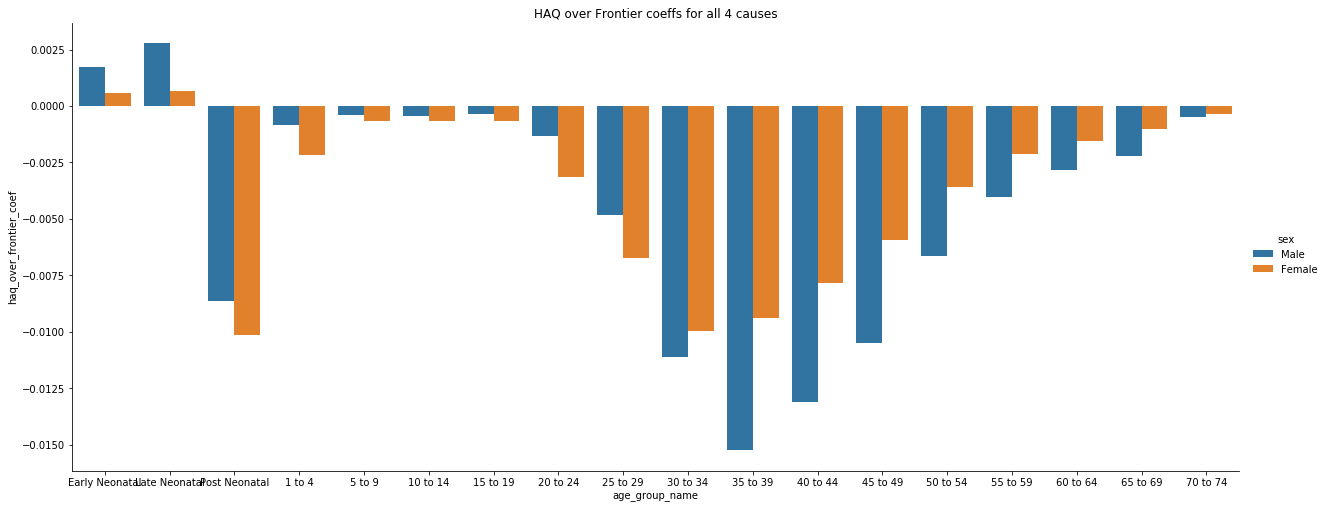

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x="age_group_name", y="haq_over_frontier_coef", hue="sex", kind="bar", height=7, aspect=2.5, ci=None,\
            data=dalys_haq_sdi_answers_out)
plt.title('HAQ over Frontier coeffs for all 4 causes')

In [68]:
all_causes = dalys_haq_sdi_answers_out['cause_name'].unique()

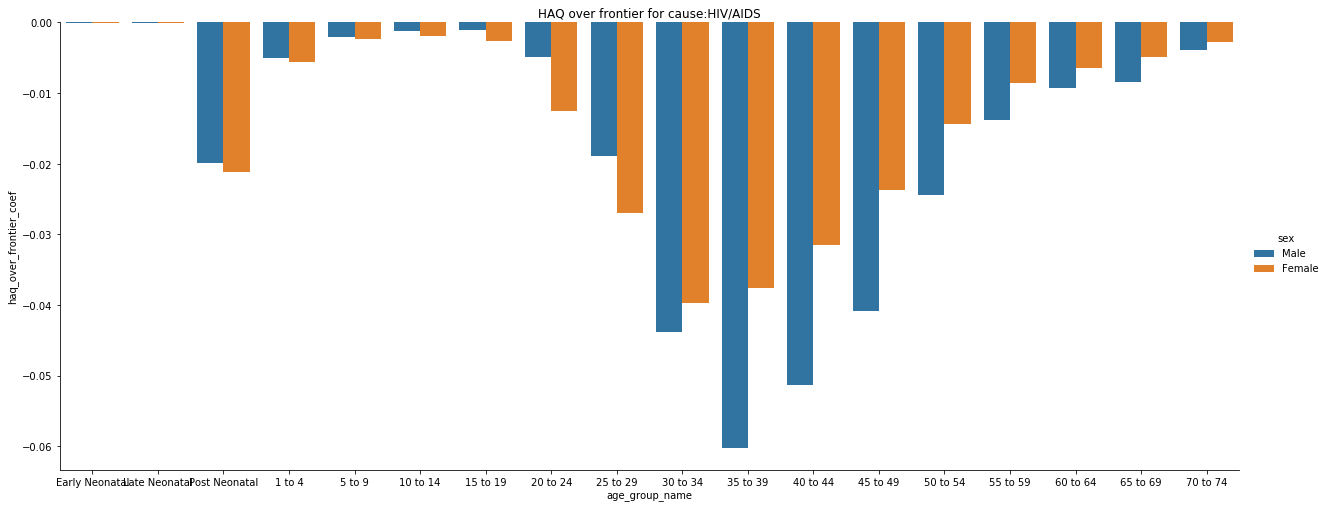

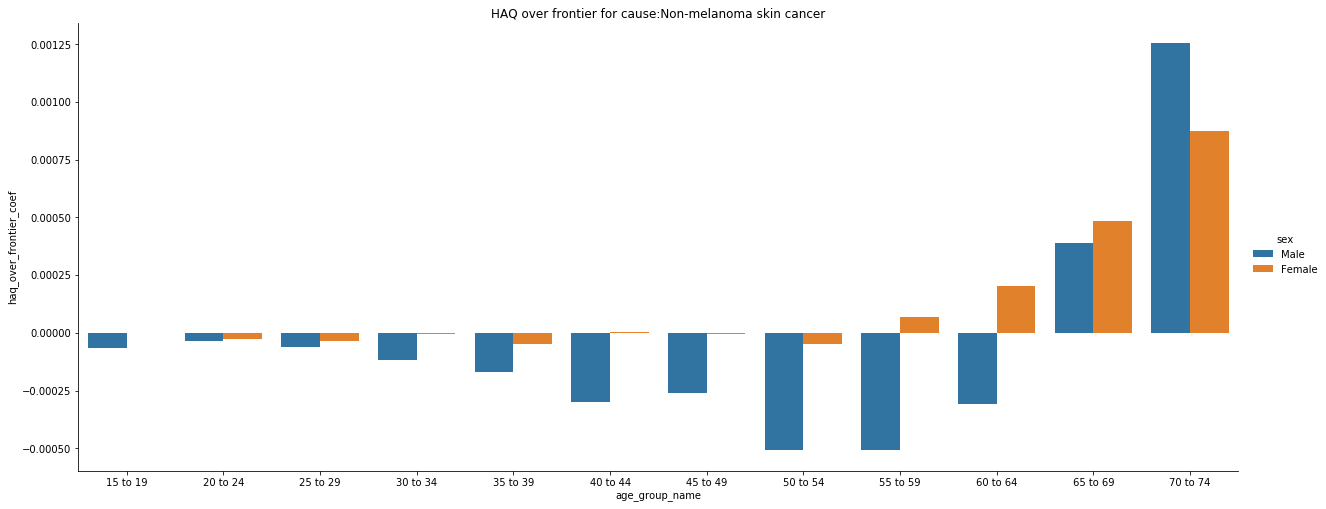

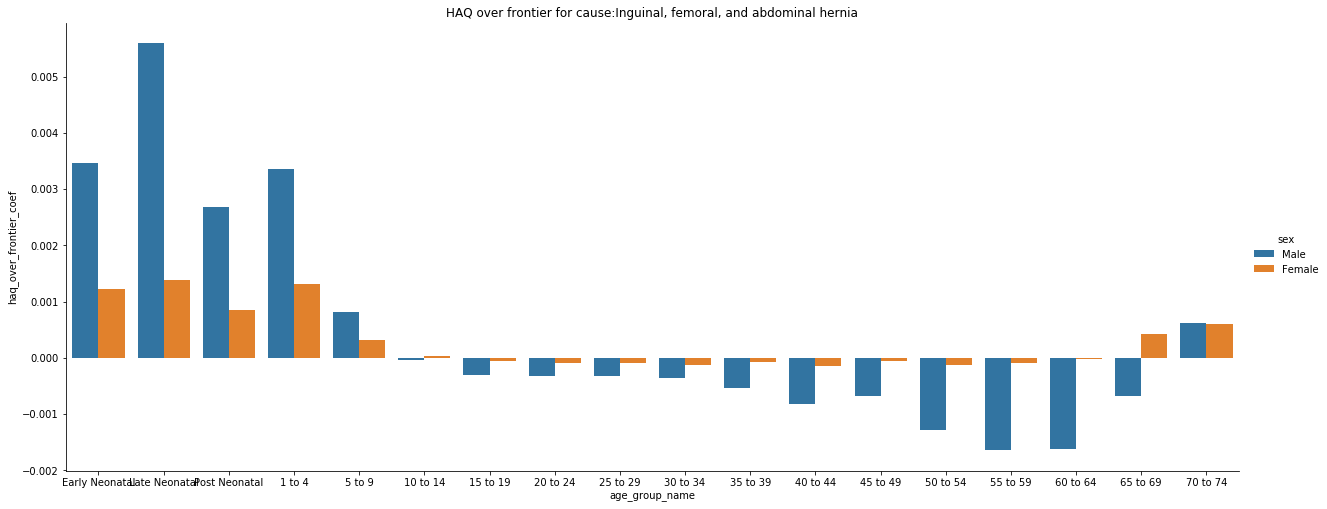

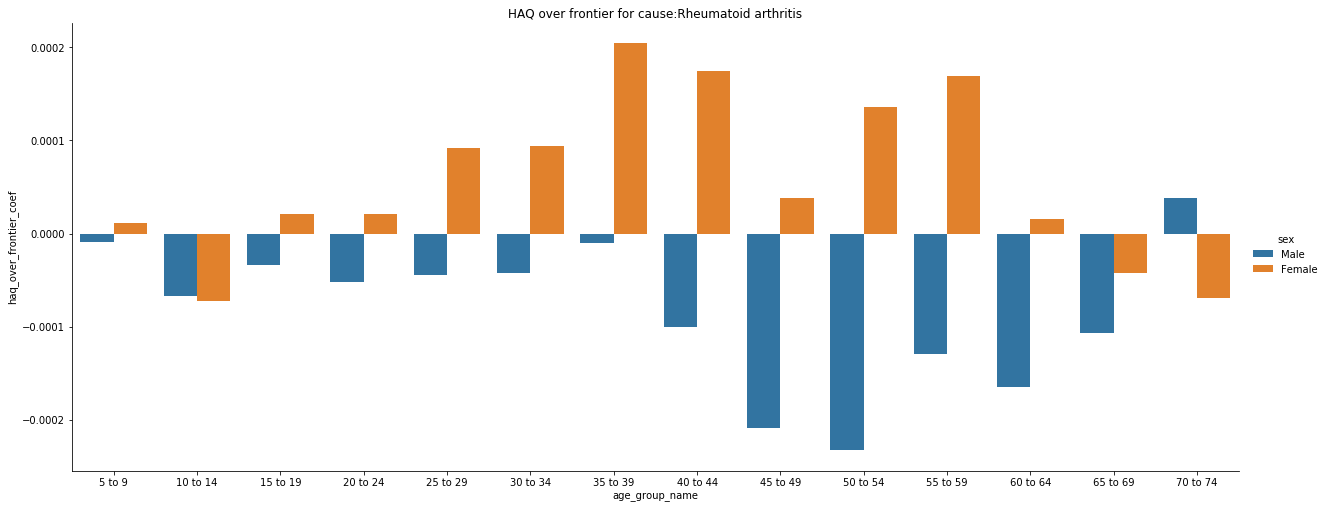

In [69]:
for c in all_causes:
    ax = sns.catplot(x="age_group_name", y="haq_over_frontier_coef", hue="sex", kind="bar", height=7, aspect=2.5, ci=None,\
            data=dalys_haq_sdi_answers_out[dalys_haq_sdi_answers_out['cause_name']==c])
    plt.title("HAQ over frontier for cause:" + c)

Text(0.5, 1.0, 'SDI coeffs for all 4 causes')

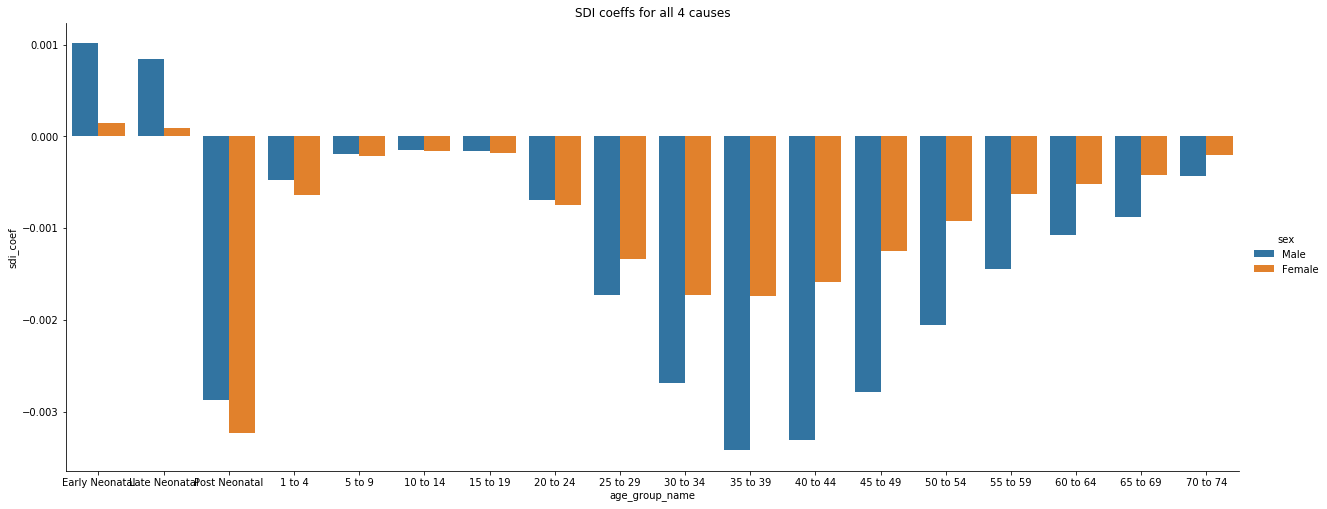

In [70]:
sns.catplot(x="age_group_name", y="sdi_coef", hue="sex", kind="bar", height=7, aspect=2.5, ci=None, \
            data=dalys_haq_sdi_answers_out)
plt.title('SDI coeffs for all 4 causes')

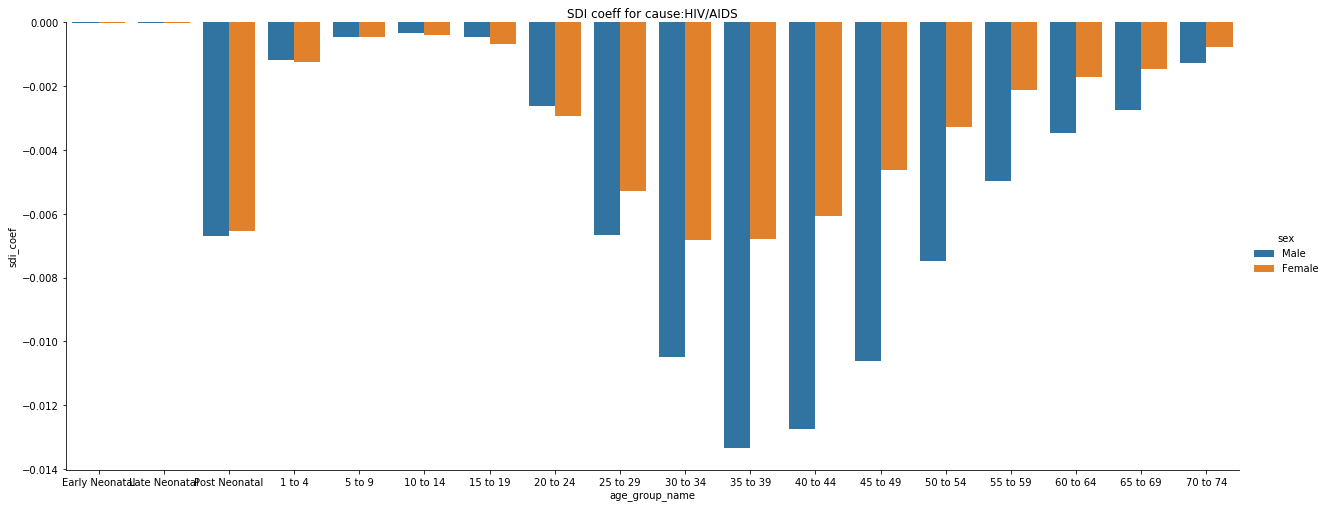

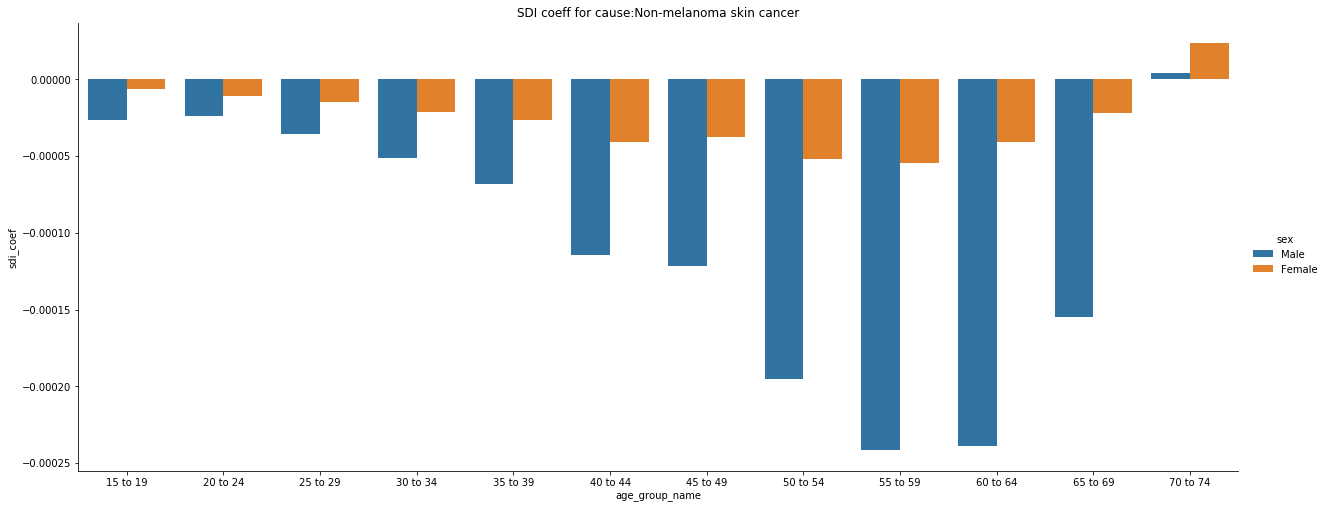

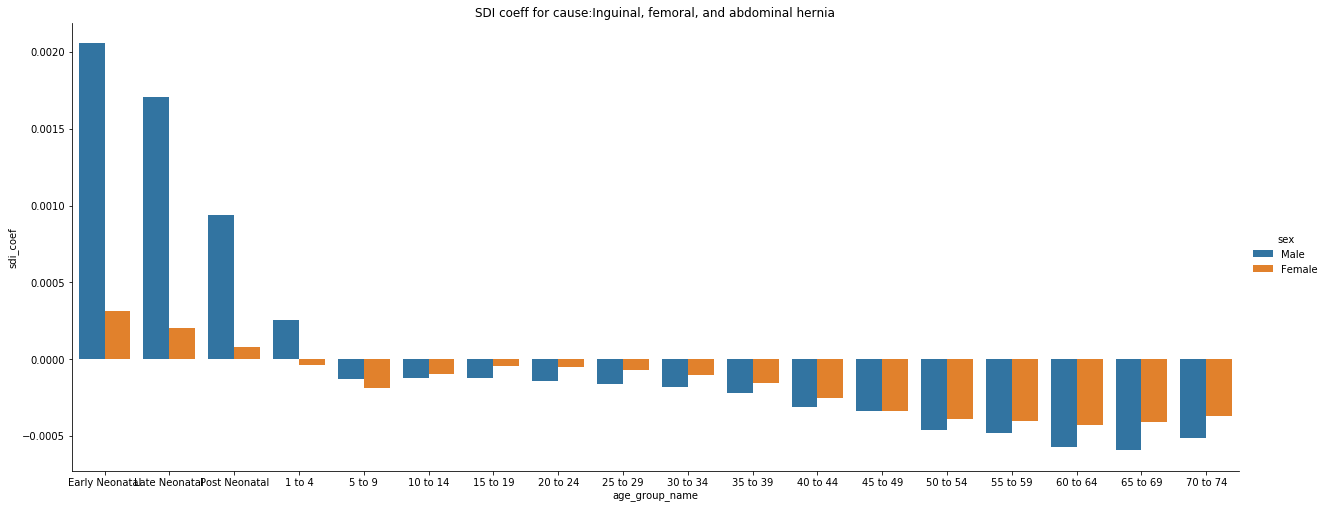

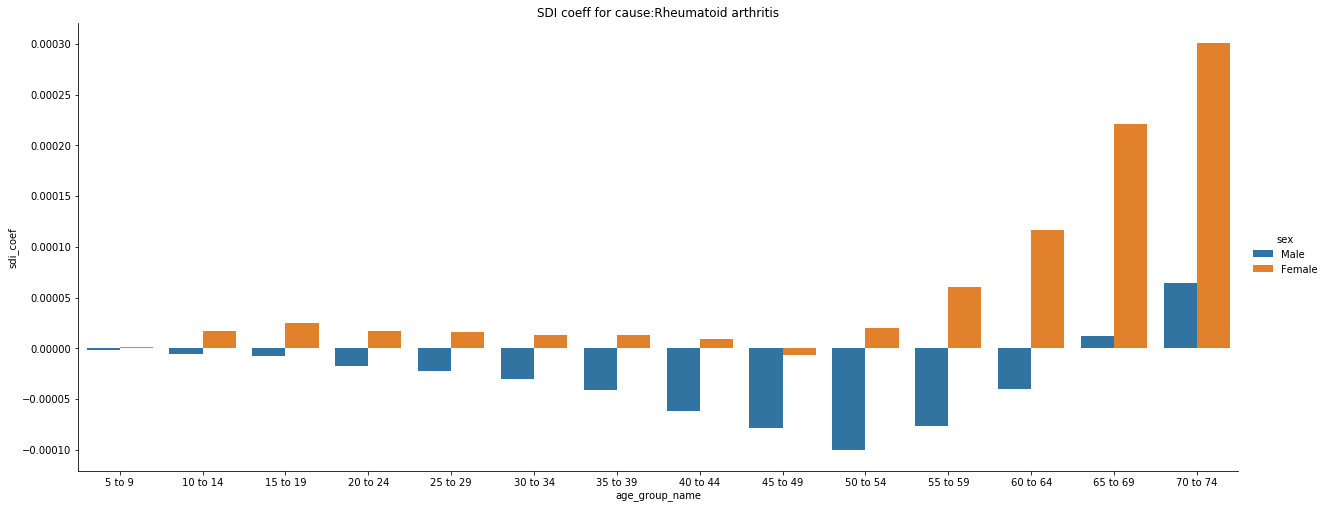

In [71]:
for c in all_causes:
    ax = sns.catplot(x="age_group_name", y="sdi_coef", hue="sex", kind="bar", height=7, aspect=2.5, ci=None, \
            data=dalys_haq_sdi_answers_out[dalys_haq_sdi_answers_out['cause_name']==c])
    plt.title("SDI coeff for cause:" + c)

### Plotting only the 44 coefficient values which were statistically significant

Text(0.5, 1.0, 'HAQ over Frontier coeffs for all 4 causes')

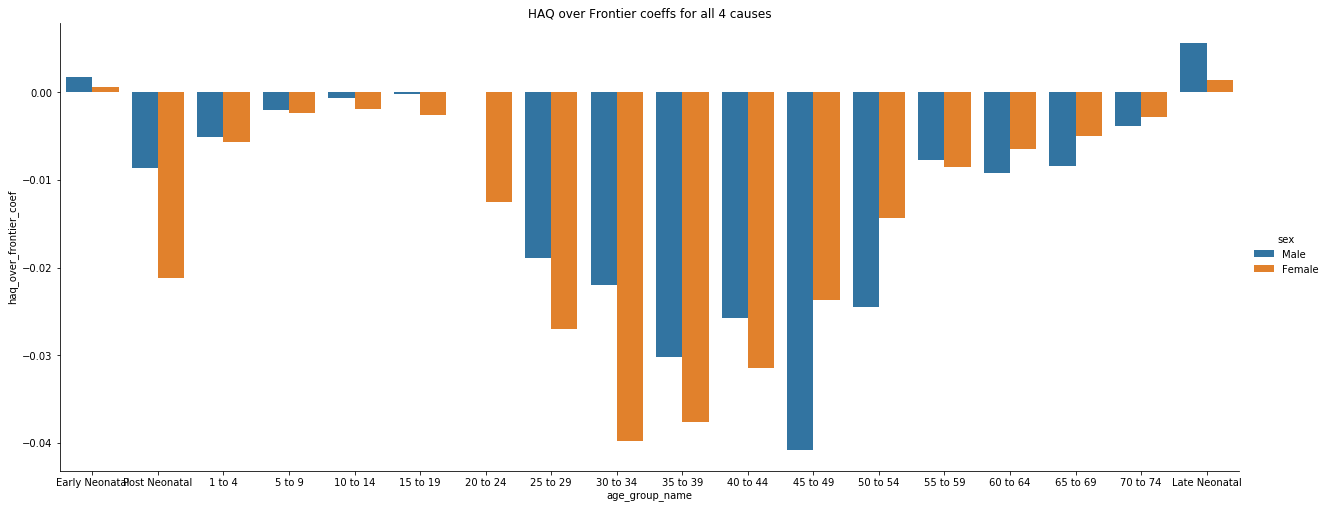

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x="age_group_name", y="haq_over_frontier_coef", hue="sex", kind="bar", height=7, aspect=2.5, ci=None,\
            data=dalys_haq_sdi_answers_out_significant)
plt.title('HAQ over Frontier coeffs for all 4 causes')

In [73]:
all_causes = dalys_haq_sdi_answers_out_significant['cause_name'].unique()

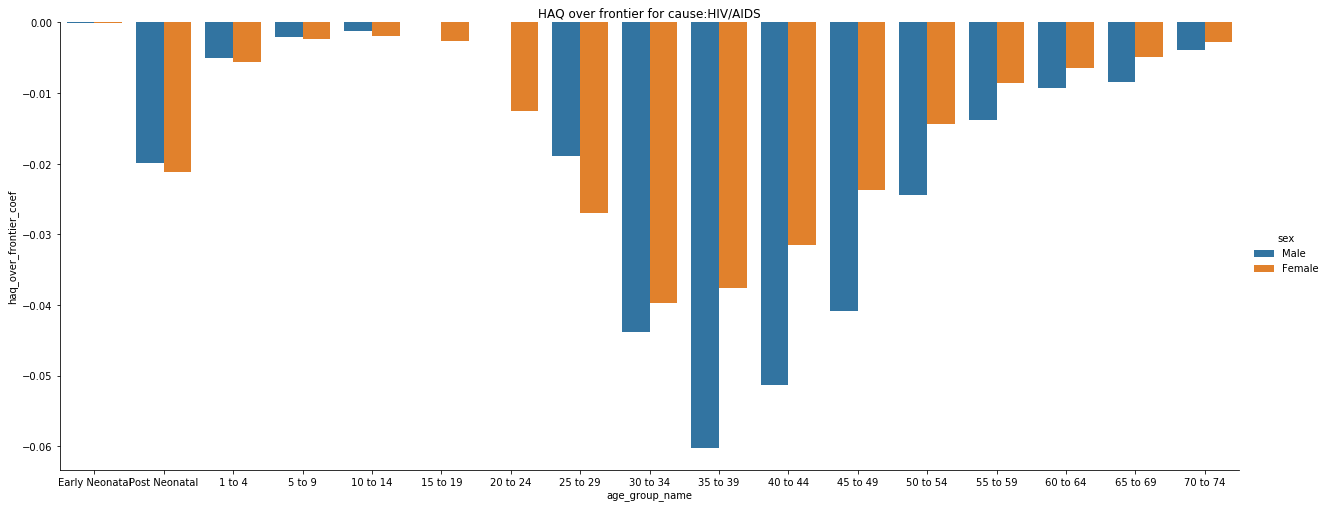

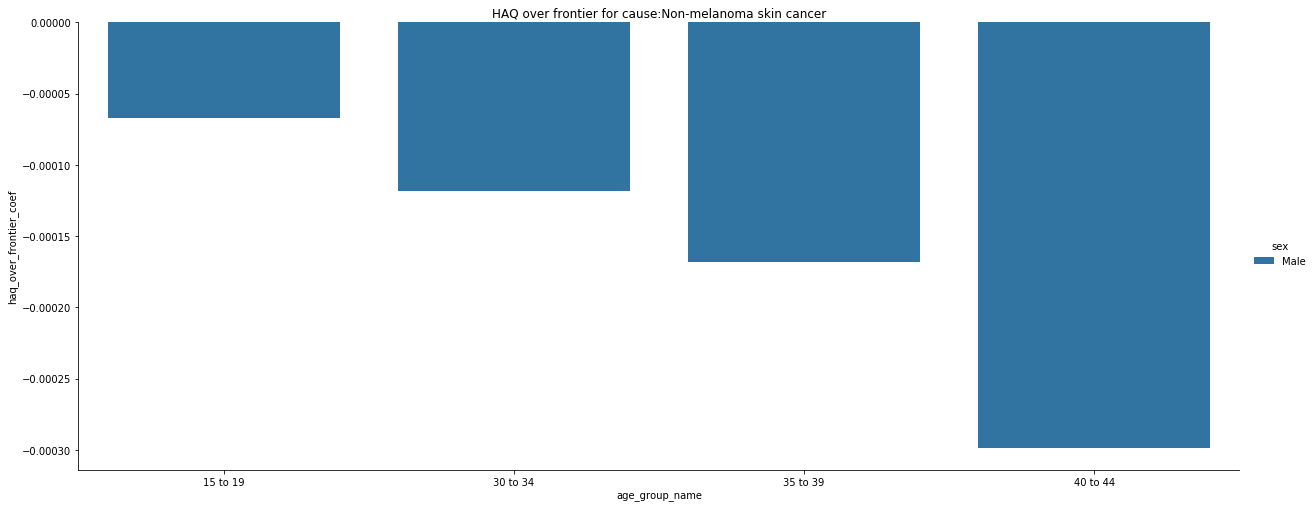

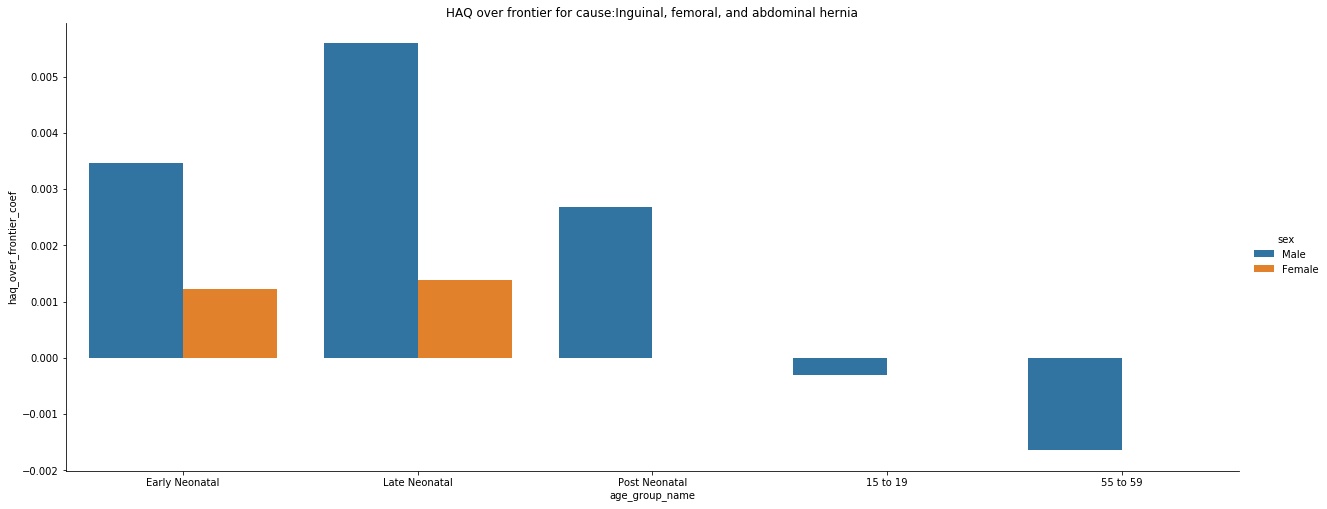

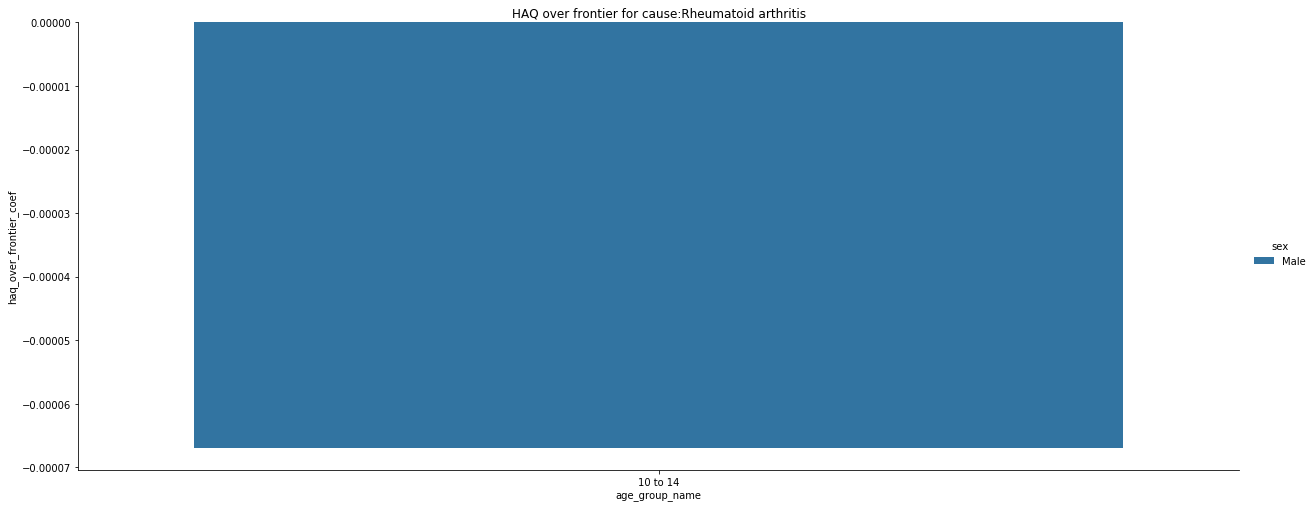

In [74]:
for c in all_causes:
    ax = sns.catplot(x="age_group_name", y="haq_over_frontier_coef", hue="sex", kind="bar", height=7, aspect=2.5, ci=None,\
            data=dalys_haq_sdi_answers_out_significant[dalys_haq_sdi_answers_out_significant['cause_name']==c])
    plt.title("HAQ over frontier for cause:" + c)

Text(0.5, 1.0, 'SDI coeffs for all 4 causes')

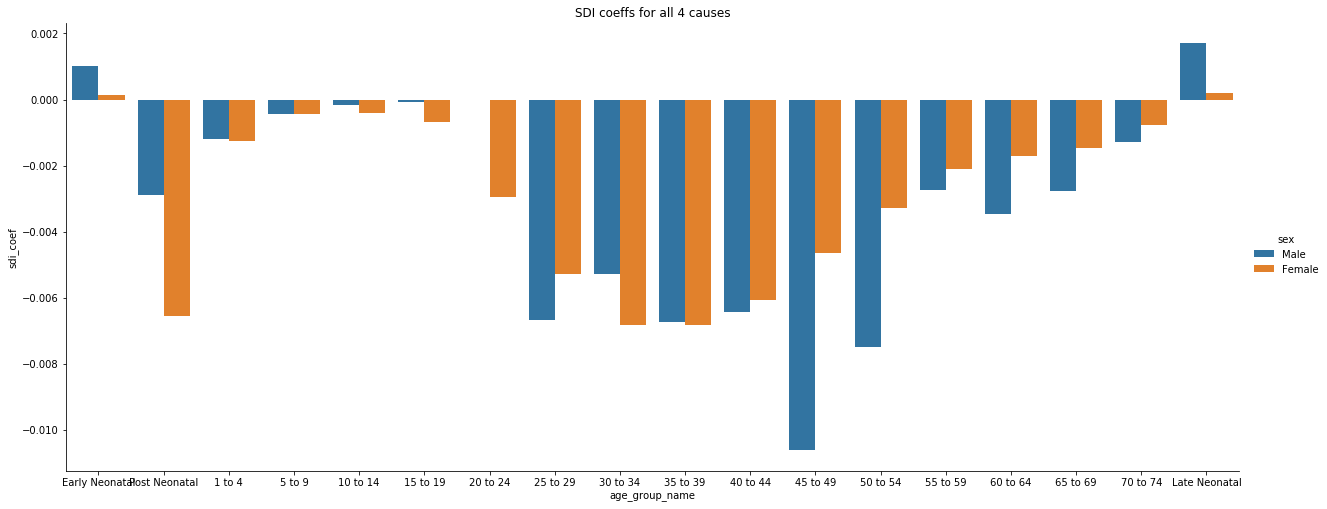

In [75]:
sns.catplot(x="age_group_name", y="sdi_coef", hue="sex", kind="bar", height=7, aspect=2.5, ci=None,\
            data=dalys_haq_sdi_answers_out_significant)
plt.title('SDI coeffs for all 4 causes')

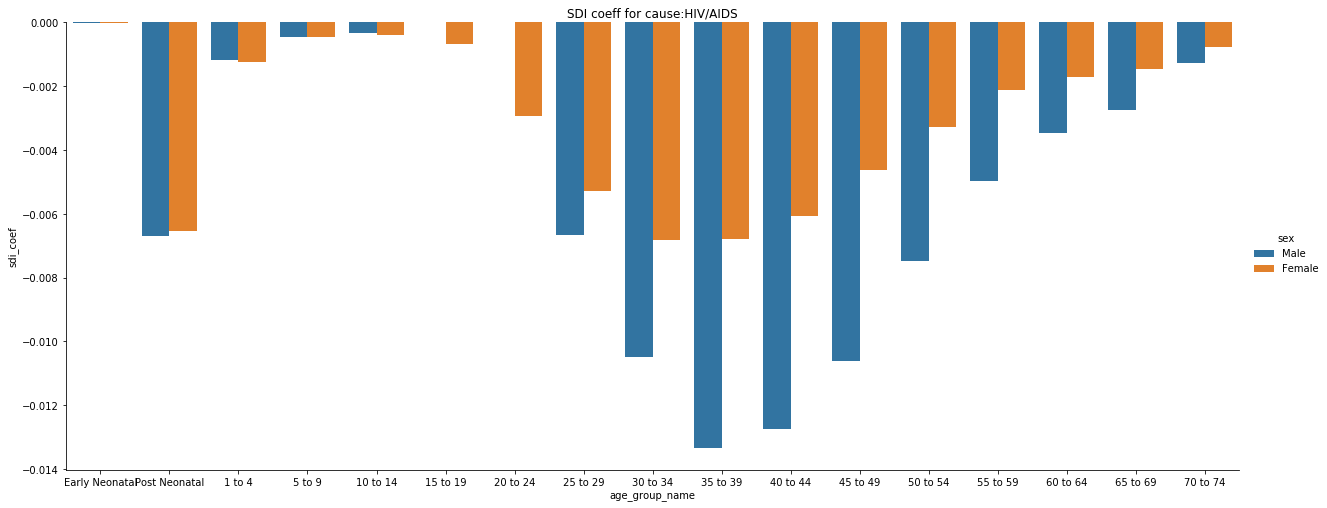

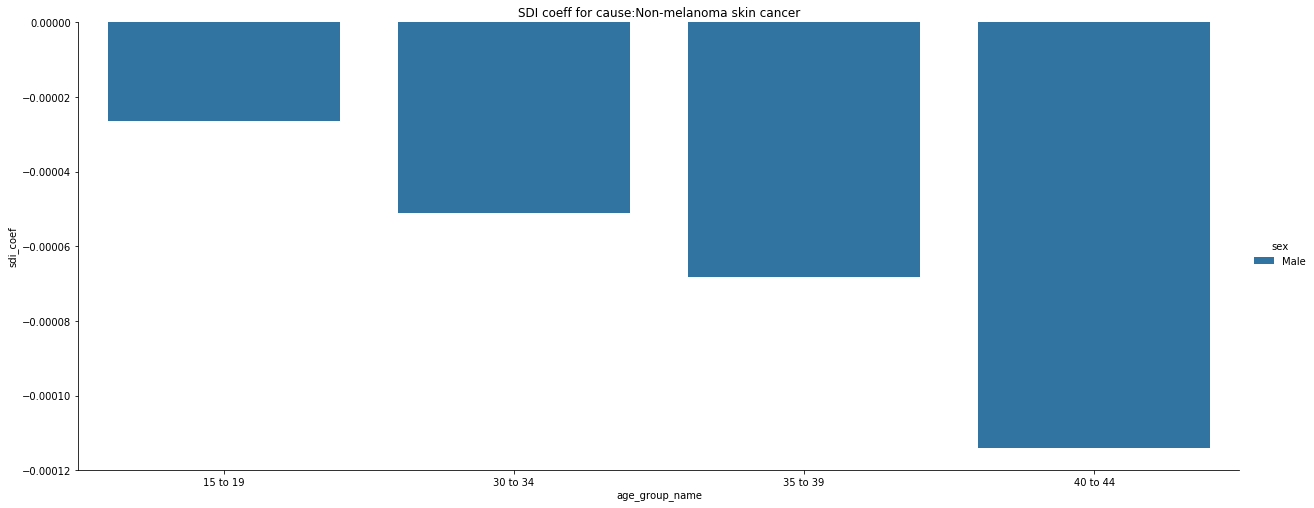

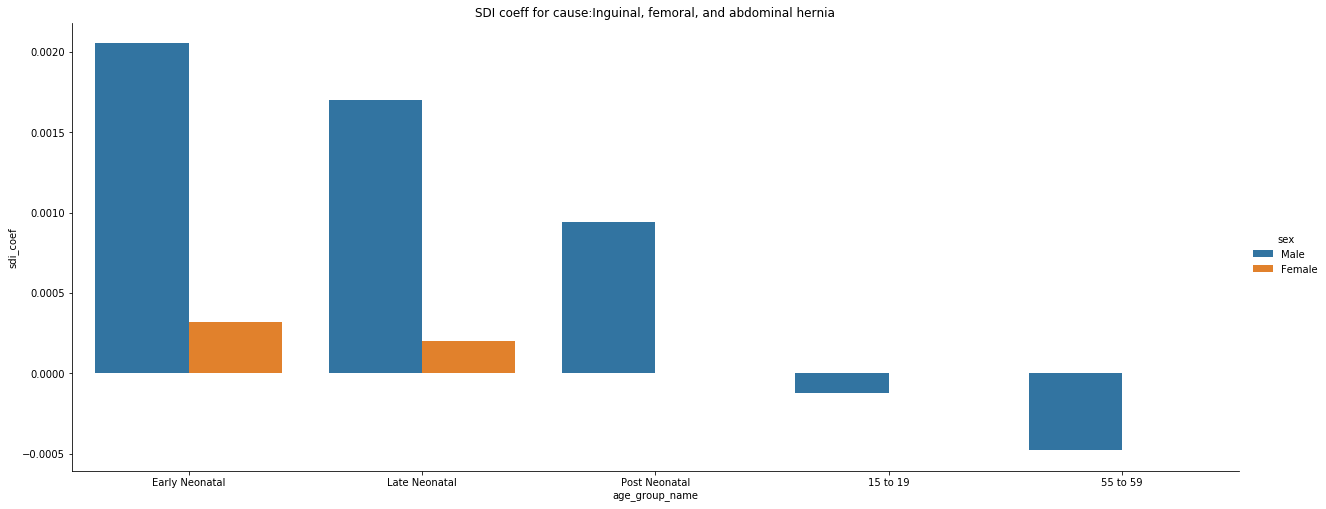

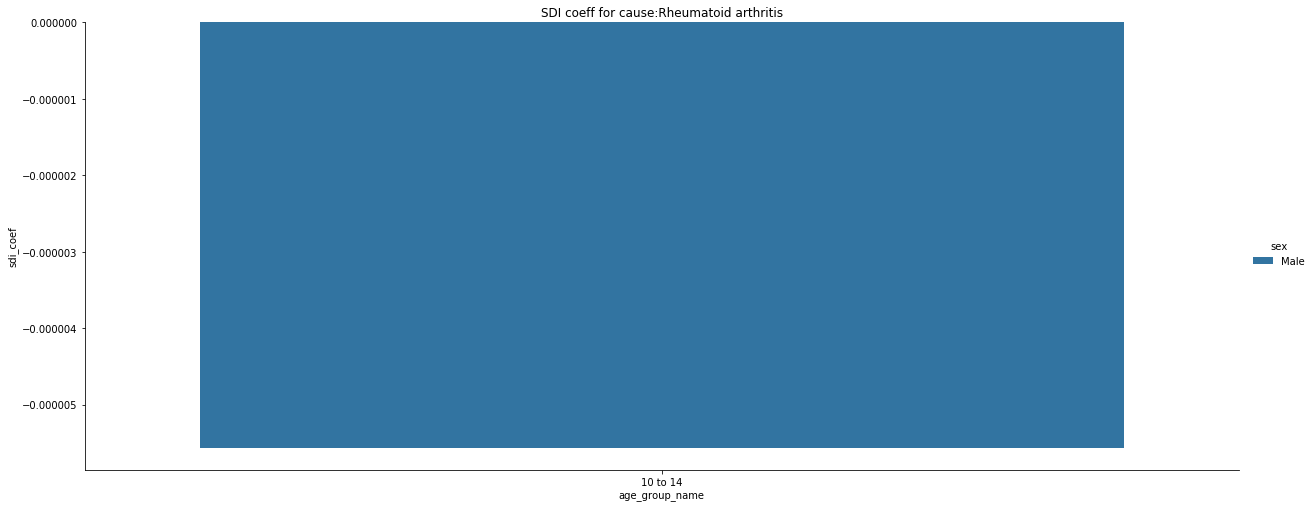

In [76]:
for c in all_causes:
    ax = sns.catplot(x="age_group_name", y="sdi_coef", hue="sex", kind="bar", height=7, aspect=2.5, ci=None,\
            data=dalys_haq_sdi_answers_out_significant[dalys_haq_sdi_answers_out_significant['cause_name']==c])
    plt.title("SDI coeff for cause:" + c)

In [77]:
dalys_haq_sdi_answers_out_significant.to_csv('/ihme/homes/arjuns13/notebooks/Documents/Data/dalys_haq_sdi_signif_dataRichLocs.csv')

In [ ]:
# Write out results to CSV
#dalys_haq_sdi_answers.to_csv('C:\\Users\\arjuns13\\Documents\\Data\\dalys_haq_sdi_analysis.csv')

In [ ]:
dalys_haq_sdi_answers.to_csv('/ihme/homes/arjuns13/notebooks/Documents/Data/dalys_haq_sdi_dataRichLocs.csv')

In [ ]:
final_df = pd.concat(dalys_haq_sdi_grouped.values())
final_df.shape

In [ ]:
final_df.columns

In [ ]:
4*18*2*76

In [ ]:
final_df.head()